<a href="https://colab.research.google.com/github/napoles-uach/ML-FCQ/blob/main/Wine_dataset_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
# Ejemplo de https://medium.com/intuitions/fn-uci-wine-dataset-ef9f5dfc20c4

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Carga de datos
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
data.columns = ['Label', 'Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of ash ', 'Magnesium', 'Total phenols', 'Flavanoids' , 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

# Separación de variables dependientes e independientes
Y = data['Label'].values
X = data.drop('Label', axis=1).values

# División de datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Normalización de los datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Convertir etiquetas a one-hot encoding
Y_train = to_categorical(Y_train - 1, num_classes=3)  # Restamos 1 para tener las etiquetas en el rango [0, 2]
Y_test = to_categorical(Y_test - 1, num_classes=3)




In [59]:
Y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [60]:
# Construcción del modelo
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))  # Capa de entrada
model.add(Dense(64, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida

In [61]:
# Compilación del modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamiento del modelo
history=model.fit(X_train, Y_train, epochs=50, batch_size=10, validation_data=(X_test, Y_test))

# Evaluación del modelo
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'\nLoss: {loss:.4f}, Accuracy: {accuracy*100:.2f}%')


Epoch 1/50
15/15 [==============================] - 1s 31ms/step - loss: 0.7857 - accuracy: 0.7606 - val_loss: 0.5602 - val_accuracy: 0.9444
Epoch 2/50
15/15 [==============================] - 0s 8ms/step - loss: 0.4465 - accuracy: 0.9437 - val_loss: 0.3160 - val_accuracy: 0.9444
Epoch 3/50
15/15 [==============================] - 0s 8ms/step - loss: 0.2586 - accuracy: 0.9577 - val_loss: 0.1878 - val_accuracy: 0.9444
Epoch 4/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1638 - accuracy: 0.9789 - val_loss: 0.1234 - val_accuracy: 0.9722
Epoch 5/50
15/15 [==============================] - 0s 8ms/step - loss: 0.1120 - accuracy: 0.9930 - val_loss: 0.0931 - val_accuracy: 0.9722
Epoch 6/50
15/15 [==============================] - 0s 7ms/step - loss: 0.0845 - accuracy: 0.9859 - val_loss: 0.0713 - val_accuracy: 0.9722
Epoch 7/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0619 - accuracy: 0.9930 - val_loss: 0.0574 - val_accuracy: 0.9722
Epoch 8/50
15/15 [=

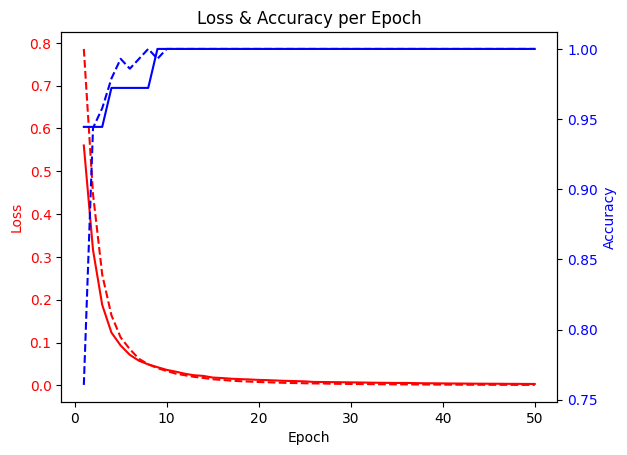

In [62]:
import matplotlib.pyplot as plt

# Obtener los datos del historial
training_loss = history.history['loss']
test_loss = history.history['val_loss']

training_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

# Crear count de épocas
epoch_count = range(1, len(training_loss) + 1)

# Crear la figura y los ejes
fig, ax1 = plt.subplots()

# Graficar la pérdida en el eje y de la izquierda
ax1.plot(epoch_count, training_loss, 'r--')
ax1.plot(epoch_count, test_loss, 'r-')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Crear un segundo eje y para la precisión
ax2 = ax1.twinx()
ax2.plot(epoch_count, training_accuracy, 'b--')
ax2.plot(epoch_count, test_accuracy, 'b-')
ax2.set_ylabel('Accuracy', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Mostrar la gráfica
plt.title('Loss & Accuracy per Epoch')
plt.show()


2/2 [==============================] - 0s 8ms/step


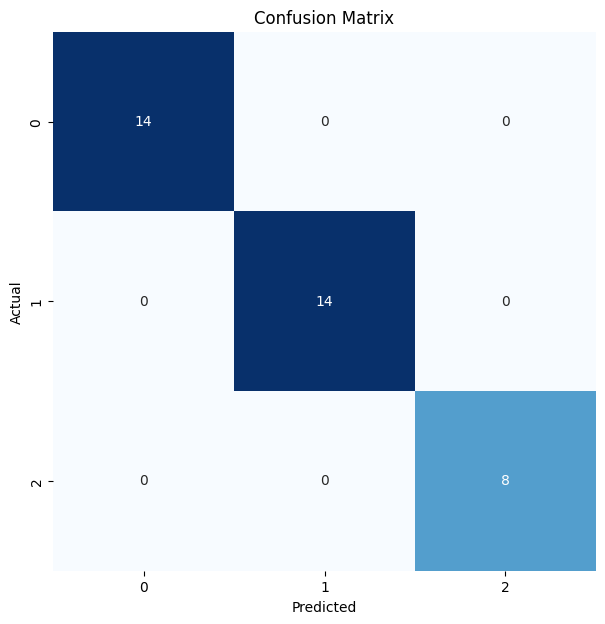

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Realizar predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)

# Matriz de confusión
conf_mat = confusion_matrix(y_true_classes, y_pred_classes)

# Visualizar la matriz de confusión
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Informe de clasificación
print("Classification Report:\n", classification_report(y_true_classes, y_pred_classes))


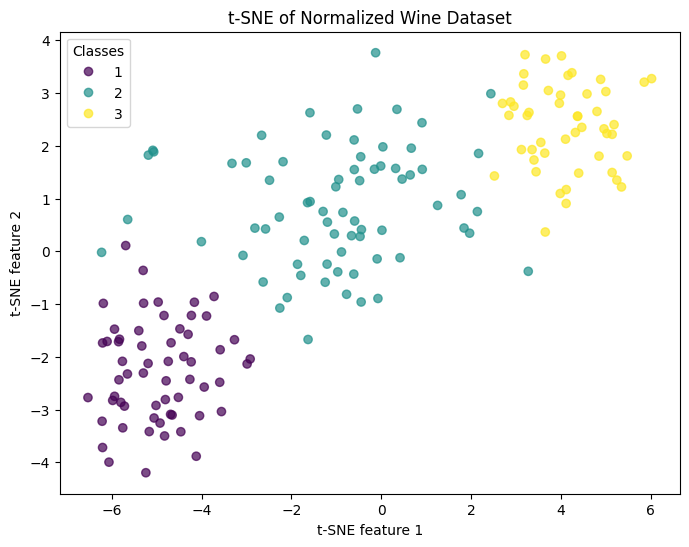

In [64]:
# Suponiendo que 'X' es tu matriz de datos y 'labels' las etiquetas
# Normalización de los datos
from sklearn.manifold import TSNE
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=1,perplexity=60)
X_tsne = tsne.fit_transform(X_normalized)

# Visualizar los resultados
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=Y, cmap='viridis', alpha=0.7)
plt.legend(*scatter.legend_elements(), title="Classes")
plt.title('t-SNE of Normalized Wine Dataset')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Carga y preparación de datos como en tu código anterior...

# Normalización de los datos
sc = StandardScaler()
X_normalized = sc.fit_transform(X)
Y_one_hot = to_categorical(Y - 1, num_classes=3)

# Definición del modelo en una función para poder recrearlo en cada fold
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=13, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Configuración de la validación cruzada estratificada
n_splits = 25
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=1)

# Listas para almacenar los resultados
val_accuracies = []
val_losses = []
histories=[]

# Bucle para entrenar y validar el modelo en cada fold
fold = 0
for train_idx, val_idx in skf.split(X_normalized, Y):
    fold += 1
    X_train, X_val = X_normalized[train_idx], X_normalized[val_idx]
    Y_train, Y_val = Y_one_hot[train_idx], Y_one_hot[val_idx]

    model = create_model()
    print(f"\nTraining on fold {fold}/{n_splits}...")
    history = model.fit(X_train, Y_train, epochs=50, batch_size=10, validation_data=(X_val, Y_val), verbose=0)
    histories.append(history)
    # Evaluación y otros análisis/visualizaciones aquí...
    loss, accuracy = model.evaluate(X_val, Y_val, verbose=0)
    print(f"Validation Accuracy: {accuracy*100:.2f}%")

    # Almacenar los resultados
    val_accuracies.append(accuracy)
    val_losses.append(loss)



Training on fold 1/25...
Validation Accuracy: 100.00%

Training on fold 2/25...
Validation Accuracy: 100.00%

Training on fold 3/25...
Validation Accuracy: 100.00%

Training on fold 4/25...
Validation Accuracy: 100.00%

Training on fold 5/25...
Validation Accuracy: 100.00%

Training on fold 6/25...
Validation Accuracy: 100.00%

Training on fold 7/25...
Validation Accuracy: 100.00%

Training on fold 8/25...
Validation Accuracy: 100.00%

Training on fold 9/25...
Validation Accuracy: 100.00%

Training on fold 10/25...
Validation Accuracy: 100.00%

Training on fold 11/25...
Validation Accuracy: 100.00%

Training on fold 12/25...
Validation Accuracy: 85.71%

Training on fold 13/25...
Validation Accuracy: 100.00%

Training on fold 14/25...
Validation Accuracy: 100.00%

Training on fold 15/25...
Validation Accuracy: 100.00%

Training on fold 16/25...
Validation Accuracy: 85.71%

Training on fold 17/25...
Validation Accuracy: 100.00%

Training on fold 18/25...
Validation Accuracy: 100.00%

Tr

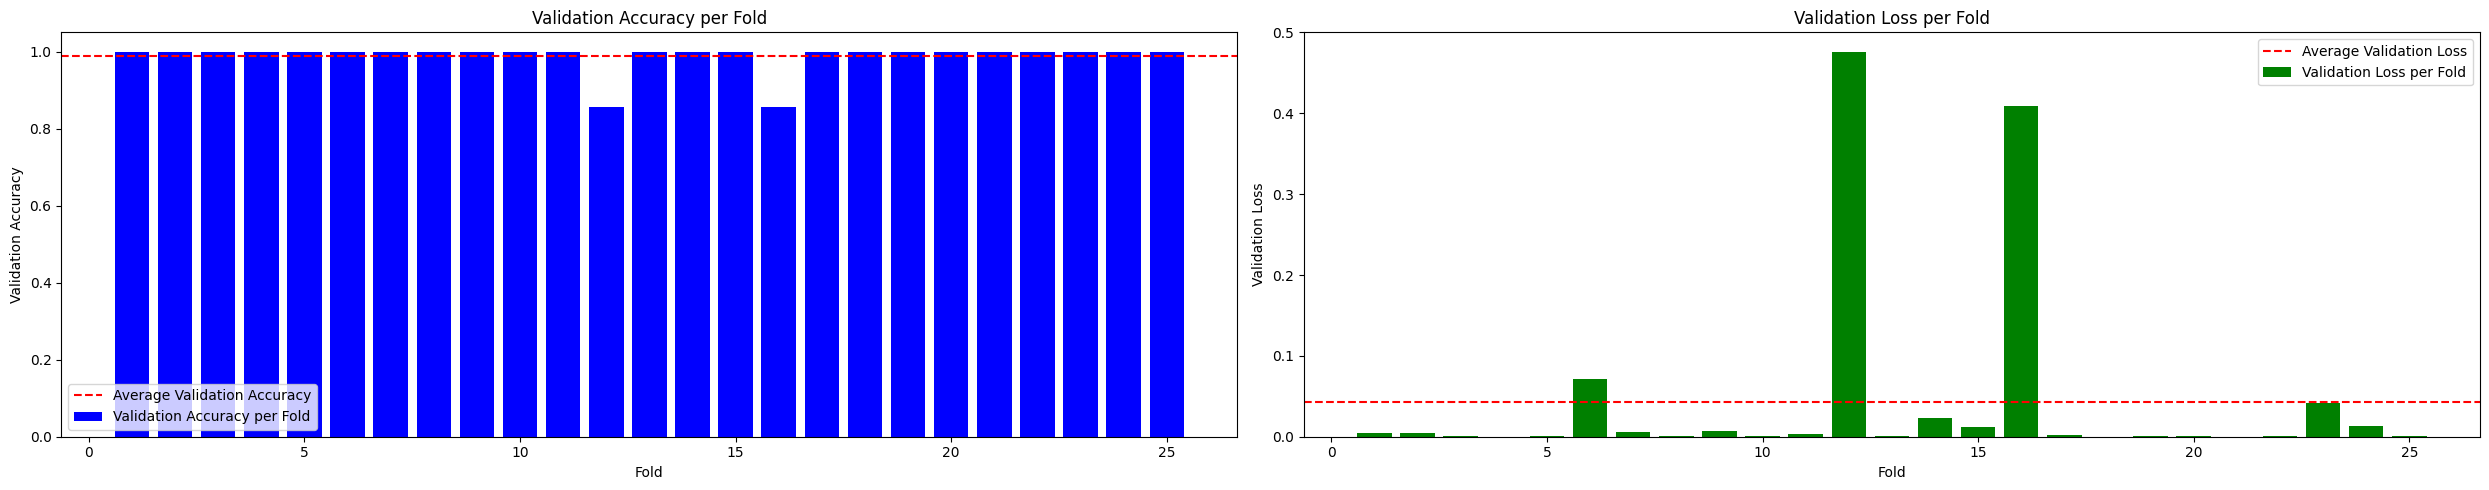

In [66]:
import matplotlib.pyplot as plt

# Crear una figura y un conjunto de subgráficos
fig, axs = plt.subplots(1, 2, figsize=(25, 5))

# Gráfico de barras para la precisión de validación
axs[0].bar(range(1, n_splits+1), val_accuracies, color='blue', label='Validation Accuracy per Fold')
axs[0].axhline(np.mean(val_accuracies), color='red', linestyle='--', label='Average Validation Accuracy')
axs[0].set_xlabel('Fold')
axs[0].set_ylabel('Validation Accuracy')
axs[0].set_title('Validation Accuracy per Fold')
axs[0].legend()

# Gráfico de barras para la pérdida de validación
axs[1].bar(range(1, n_splits+1), val_losses, color='green', label='Validation Loss per Fold')
axs[1].axhline(np.mean(val_losses), color='red', linestyle='--', label='Average Validation Loss')
axs[1].set_xlabel('Fold')
axs[1].set_ylabel('Validation Loss')
axs[1].set_title('Validation Loss per Fold')
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


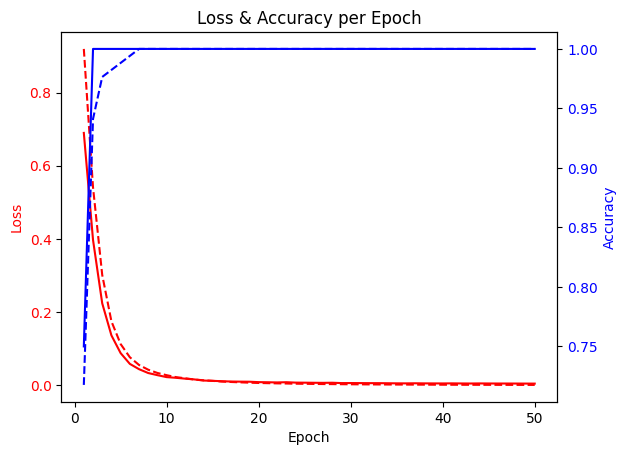

In [67]:
import matplotlib.pyplot as plt
n=0
# Obtener los datos del historial
training_loss = histories[n].history['loss']
test_loss = histories[n].history['val_loss']

training_accuracy = histories[n].history['accuracy']
test_accuracy = histories[n].history['val_accuracy']

# Crear count de épocas
epoch_count = range(1, len(training_loss) + 1)

# Crear la figura y los ejes
fig, ax1 = plt.subplots()

# Graficar la pérdida en el eje y de la izquierda
ax1.plot(epoch_count, training_loss, 'r--')
ax1.plot(epoch_count, test_loss, 'r-')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Crear un segundo eje y para la precisión
ax2 = ax1.twinx()
ax2.plot(epoch_count, training_accuracy, 'b--')
ax2.plot(epoch_count, test_accuracy, 'b-')
ax2.set_ylabel('Accuracy', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Mostrar la gráfica
plt.title('Loss & Accuracy per Epoch')
plt.show()